### <font color='green'> Credit Card Fraud Detection</font>
> * It is necessary to detect if there will be a potential ```fraud``` on a particular card, hence the essence of building a model to predict beforehand and helps us to avoid it 

In [1]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import warning
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv('data/application_data.csv')

display(data.head(5))

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [47]:
data["YEARS_BUILD_AVG"].unique()

array([6.192e-01, 7.960e-01,       nan, 7.348e-01, 9.796e-01, 8.368e-01,
       7.008e-01, 7.076e-01, 8.300e-01, 8.096e-01, 7.688e-01, 6.736e-01,
       9.456e-01, 7.416e-01, 7.892e-01, 7.280e-01, 8.436e-01, 1.160e-01,
       7.824e-01, 8.028e-01, 5.580e-01, 8.504e-01, 6.600e-01, 7.620e-01,
       6.260e-01, 9.660e-01, 9.864e-01, 6.328e-01, 9.728e-01, 8.164e-01,
       6.668e-01, 7.144e-01, 7.552e-01, 5.648e-01, 9.252e-01, 6.872e-01,
       6.532e-01, 6.940e-01, 6.464e-01, 8.572e-01, 5.784e-01, 7.484e-01,
       9.932e-01, 8.232e-01, 8.708e-01, 5.920e-01, 8.844e-01, 6.056e-01,
       9.048e-01, 5.376e-01, 8.640e-01, 6.396e-01, 8.776e-01, 9.320e-01,
       7.756e-01, 4.628e-01, 3.200e-01, 4.492e-01, 4.288e-01, 2.760e-02,
       9.116e-01, 4.764e-01, 6.804e-01, 7.212e-01, 8.980e-01, 3.268e-01,
       6.124e-01, 9.184e-01, 5.716e-01, 5.444e-01, 9.388e-01, 9.592e-01,
       8.912e-01, 4.356e-01, 3.336e-01, 1.000e+00, 3.880e-01, 5.512e-01,
       5.852e-01, 9.524e-01, 3.404e-01, 4.832e-01, 

In [3]:
#Print the number of columns and rows we have

print(f"Our dataset has {data.shape[0]} rows and {data.shape[1]} columns")

Our dataset has 307511 rows and 122 columns


In [4]:
# It is a usual practice to make a copy of our dataframe
data_copy = data.copy()

data_copy.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

#### Inference:

> ```SK_ID_CURR```: the loan ID, this might not be useful in training our dataset, so we might want to drop it
> ```TARGET```: The target loan has just two unique values, ```0 and 1```
<font color='blue'> There are columns or features with lots of empty values and NaN values, we shall address that in the future in other cells of the .ipynb file </font>, for now we shall check for duplicate values and drop them

In [5]:
def remove_duplicates(df):
    # Before dropping duplicates
    before = df.shape[0]
    # Dropping duplicates
    df.drop_duplicates(inplace=True)
    # After dropping duplicates
    after = len(df)

    result = before - after
    print(f"Before dropping duplicates, dataset has {before} rows \nAfter dropping the duplicates, dataset has {after} rows")
    if before == after:
        print('No duplicates found')
    else:
        print("Found some duplicates")
    return df

data_copy = remove_duplicates(data_copy)

Before dropping duplicates, dataset has 307511 rows 
After dropping the duplicates, dataset has 307511 rows
No duplicates found


In [7]:
# Check the overview of the dataset
def data_overview(df):
    var_df = pd.DataFrame(columns=["Feature", "Unique Values", "Number of missing values", "N-Unique", "Dtype"])

    for i, col in enumerate(df.columns):
        var_df.loc[i] = [col, df[col].unique(), df[col].isna().sum(), df[col].nunique(), df[col].dtypes]

    var_df.reset_index(inplace=True)
    return var_df

var_df = data_overview(data_copy)
display(var_df)

,index,Feature,Unique Values,Number of missing values,N-Unique,Dtype
0,0,SK_ID_CURR,"[100002, 100003, 100004, 100006, 100007, 10000...",0,307511,int64
1,1,TARGET,"[1, 0]",0,2,int64
2,2,NAME_CONTRACT_TYPE,"[Cash loans, Revolving loans]",0,2,object
3,3,CODE_GENDER,"[M, F, XNA]",0,3,object
4,4,FLAG_OWN_CAR,"[N, Y]",0,2,object
...,...,...,...,...,...,...
117,117,AMT_REQ_CREDIT_BUREAU_DAY,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 9.0, ...",41519,9,float64
118,118,AMT_REQ_CREDIT_BUREAU_WEEK,"[0.0, nan, 1.0, 3.0, 2.0, 4.0, 5.0, 6.0, 8.0, ...",41519,9,float64
119,119,AMT_REQ_CREDIT_BUREAU_MON,"[0.0, nan, 1.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, ...",41519,24,float64
120,120,AMT_REQ_CREDIT_BUREAU_QRT,"[0.0, nan, 1.0, 2.0, 4.0, 3.0, 8.0, 5.0, 6.0, ...",41519,11,float64


### Inference from the Overview

> SK_ID_CURR has so many unique values
> There are so many columns with missing values

In [8]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# Define numerical features, categorical features and continuous/discrete features

In [9]:
numerical_feats = data_copy.select_dtypes(exclude="O").columns
categorical_feats = data_copy.select_dtypes(include="O").columns

In [11]:
continuous_data = [col for col in numerical_feats if data_copy[col].nunique() >= 10 and col != 'SK_ID_CURR']
print(continuous_data)

['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'E

#### We shall normalize our numerical continuous data

In [12]:
for col in continuous_data:
    if 0 in data_copy[col]:
        pass
    else:
        data_copy[col] = np.log(data_copy[col])

#### Let's Visualize our dataset now

(-0.04424684897409669, 0.9407836637076461, 0.0, 5943.0)

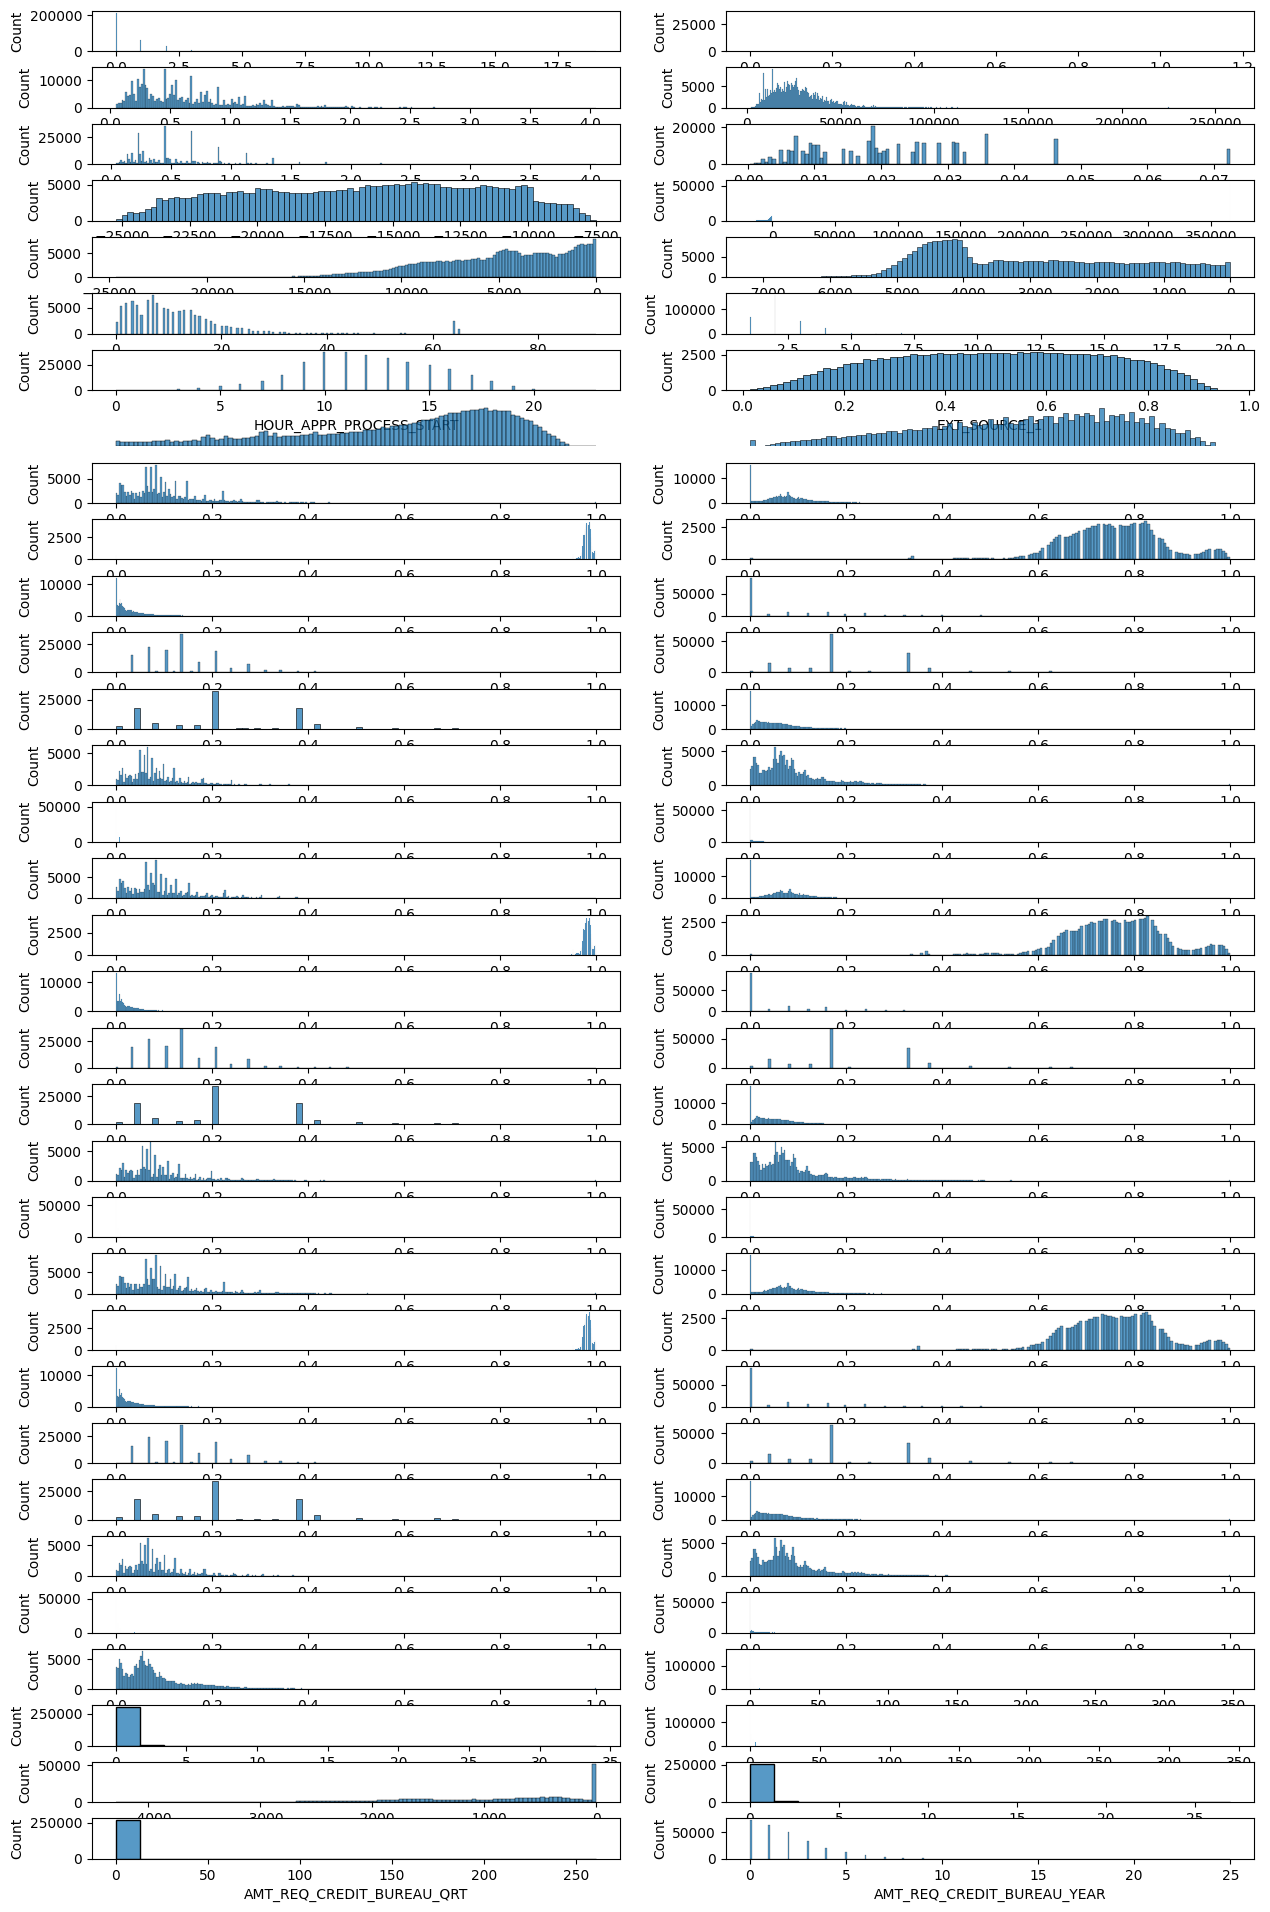

In [14]:
fig, ax = plt.subplots(nrows=(len(continuous_data)//2), ncols=2, figsize=(15,24))
plt.subplots_adjust(hspace=0.4)
for i, x in enumerate(data_copy[continuous_data].columns):
    sns.histplot(data=data_copy, x=x, ax=ax[i//2, i%2])

ax[7,0].axis("off")
ax[7,1].axis("off")

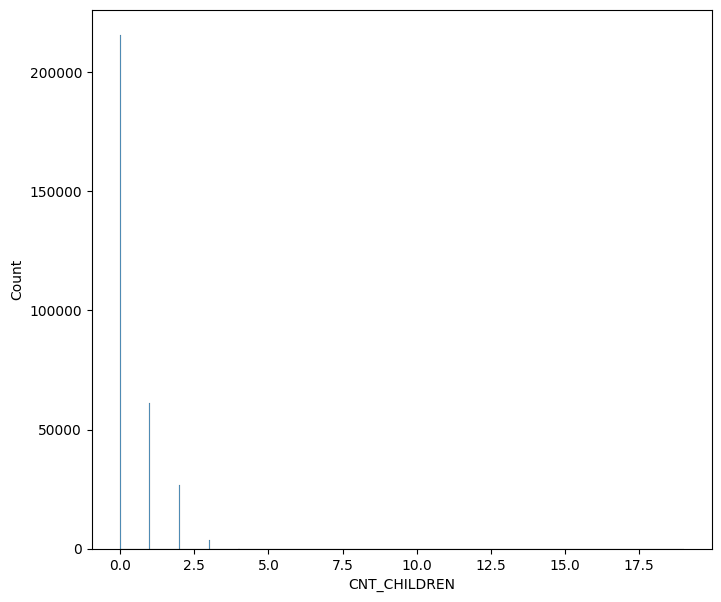

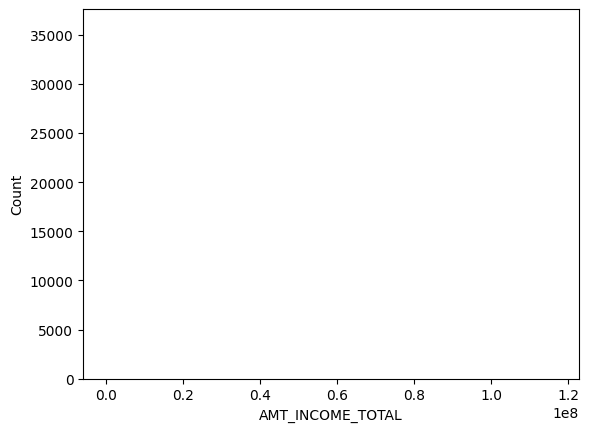

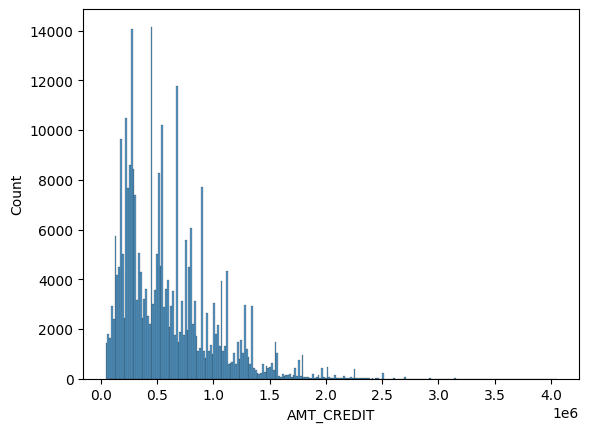

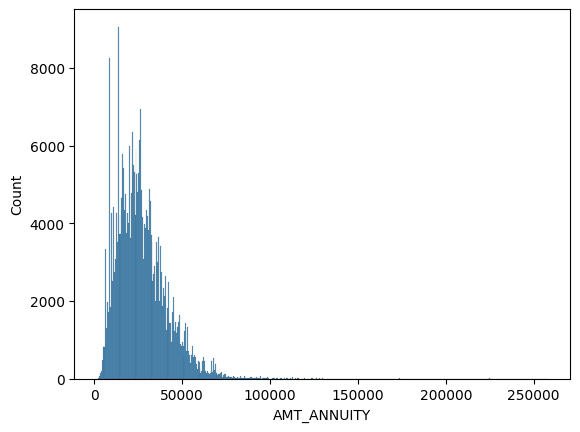

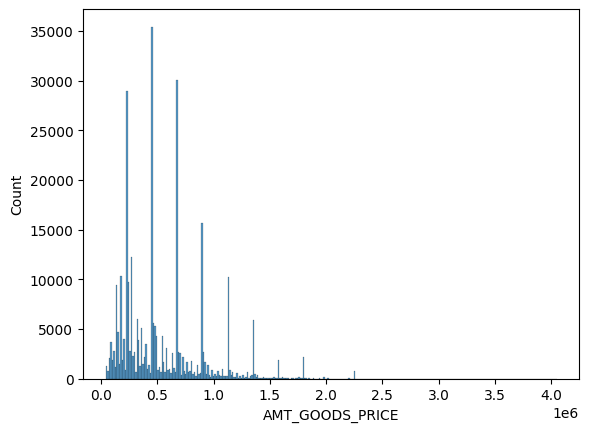

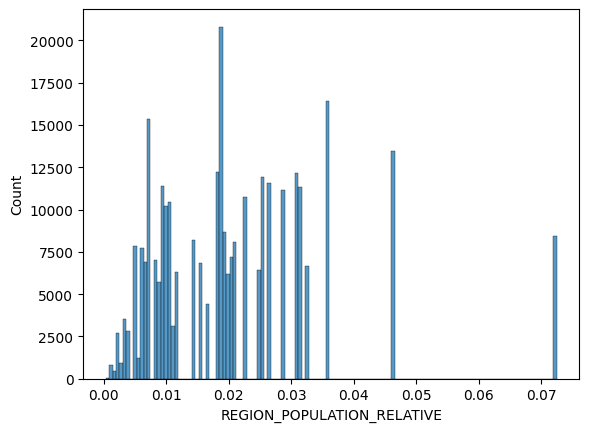

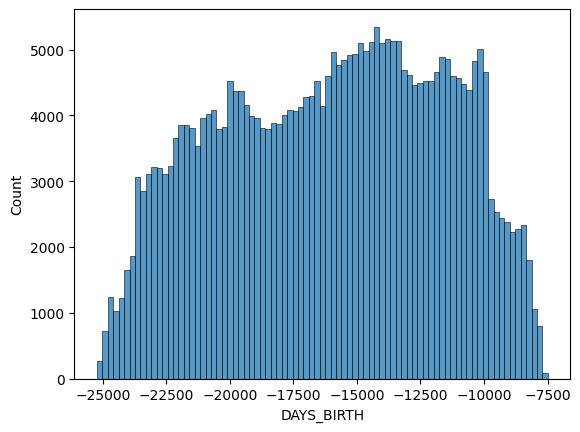

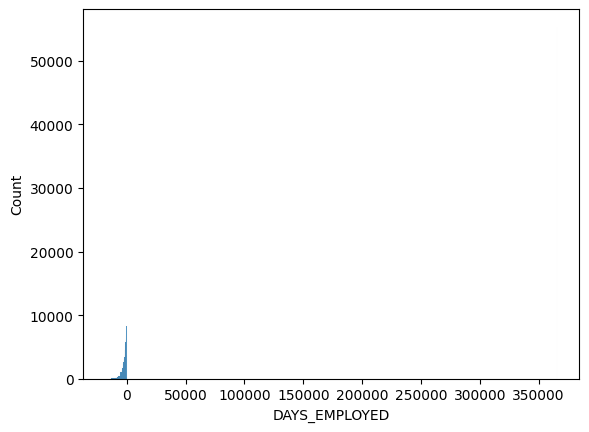

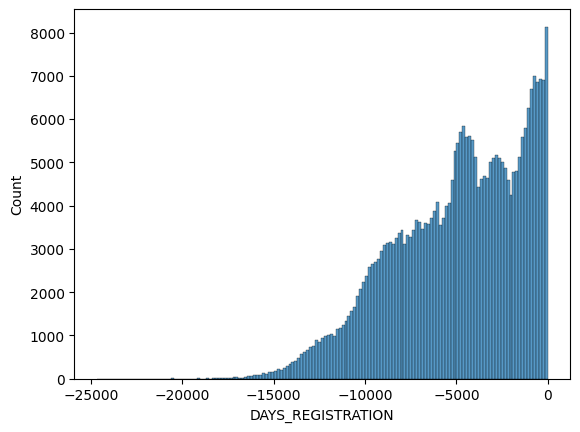

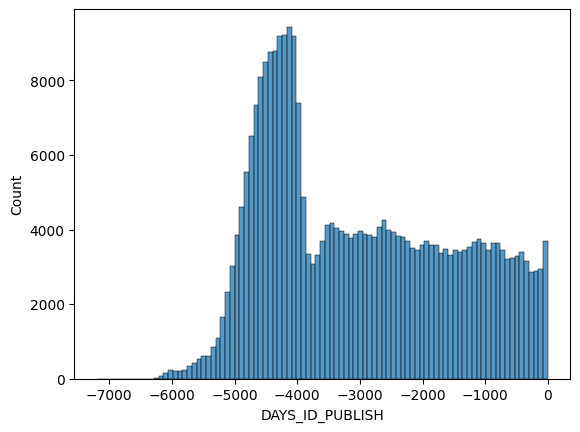

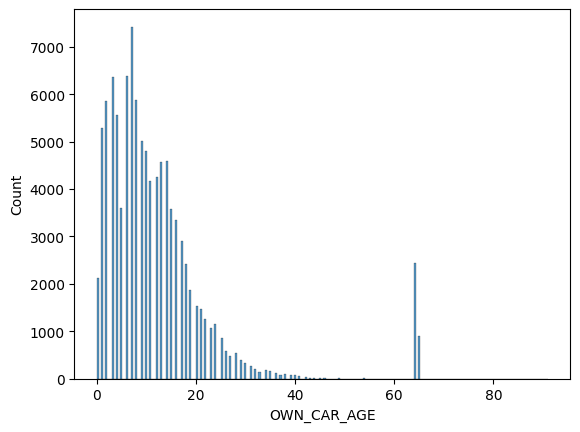

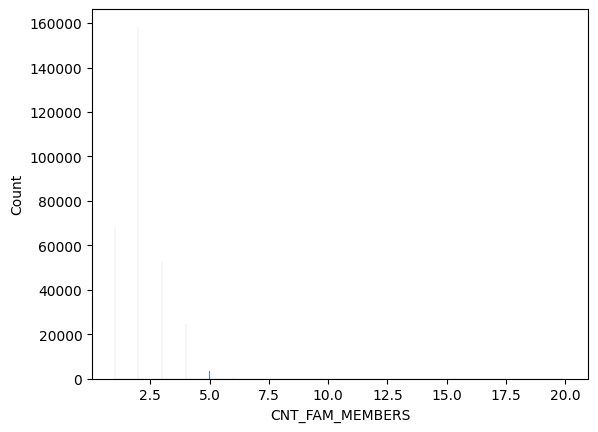

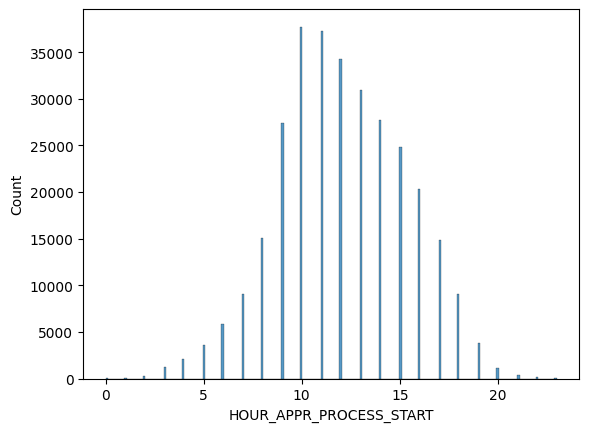

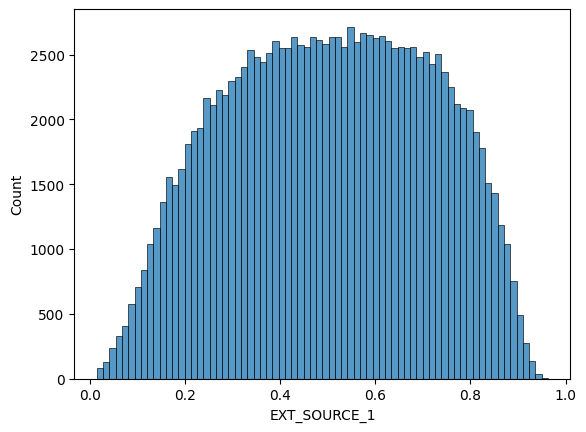

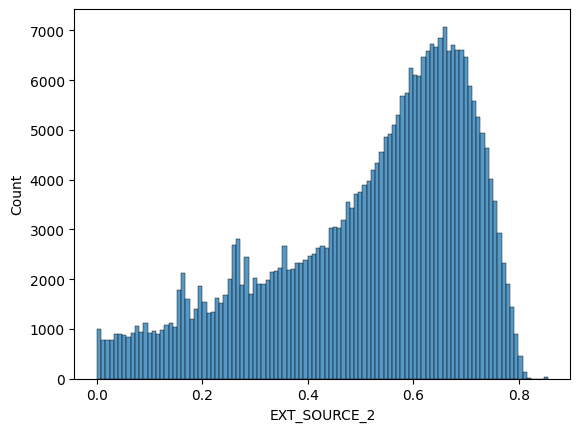

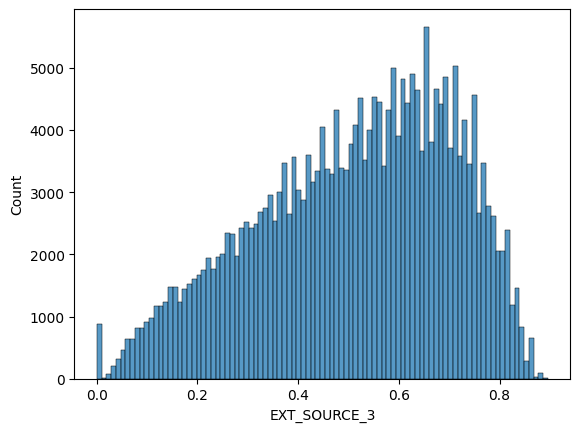

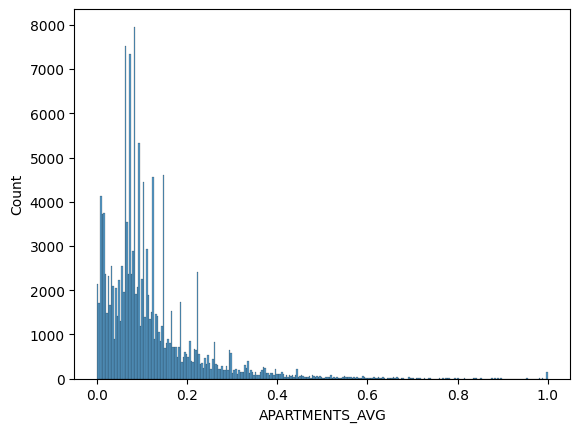

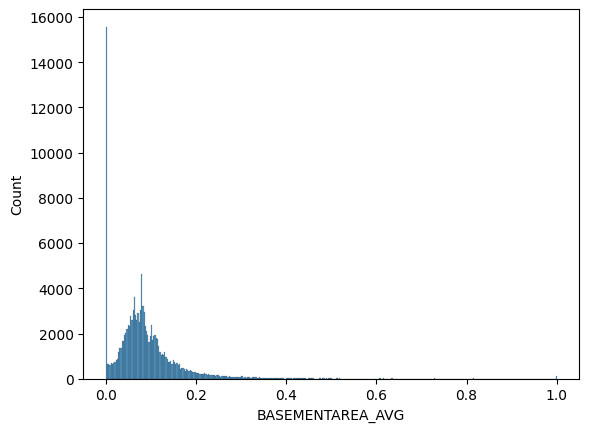

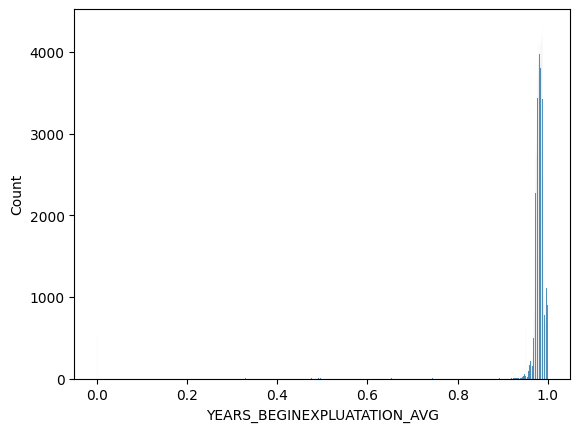

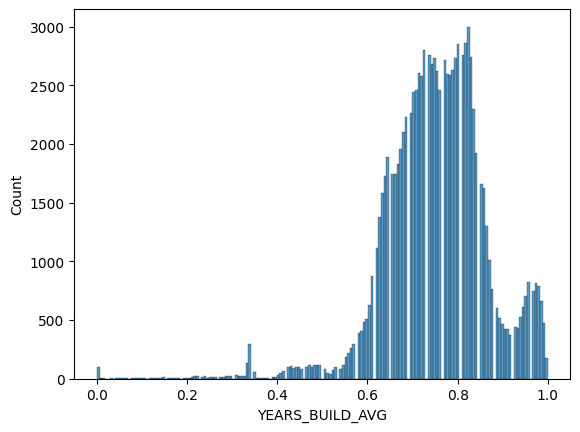

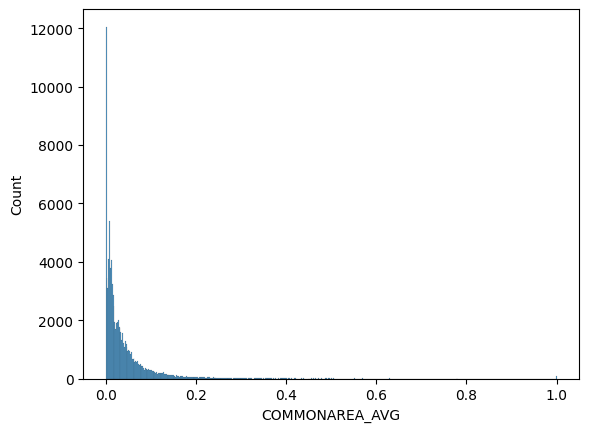

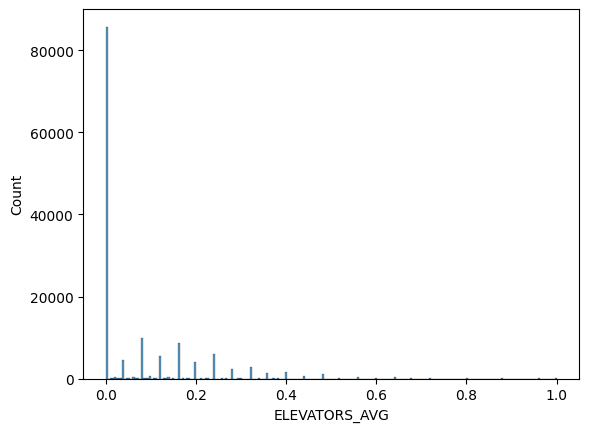

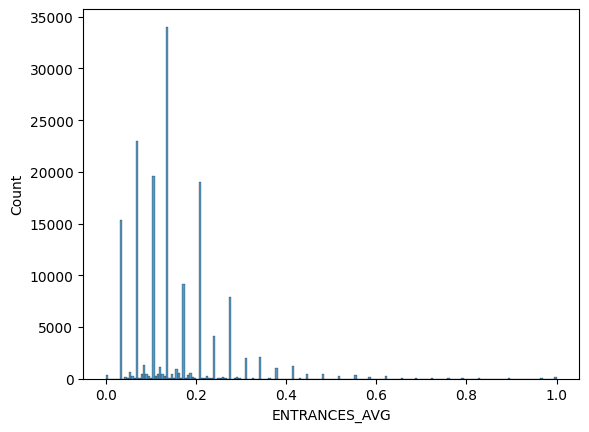

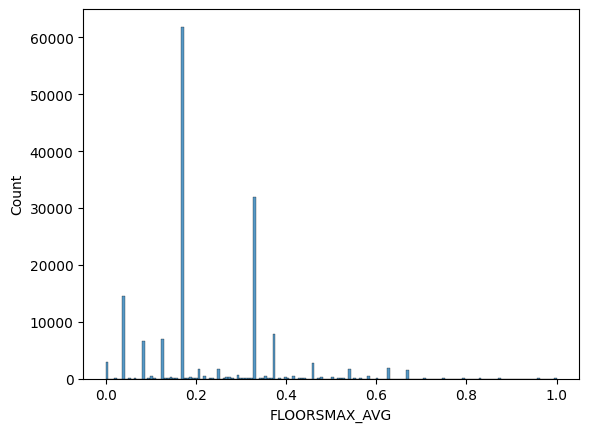

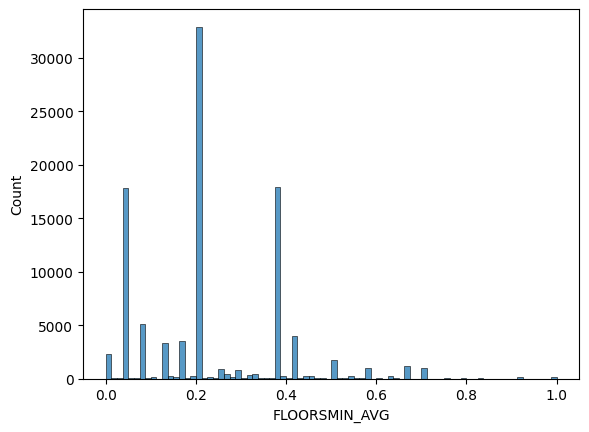

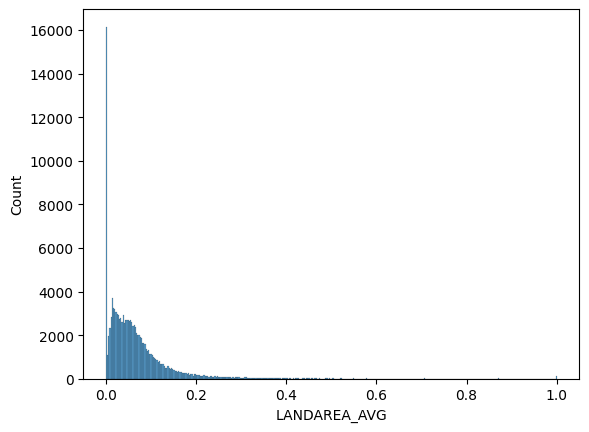

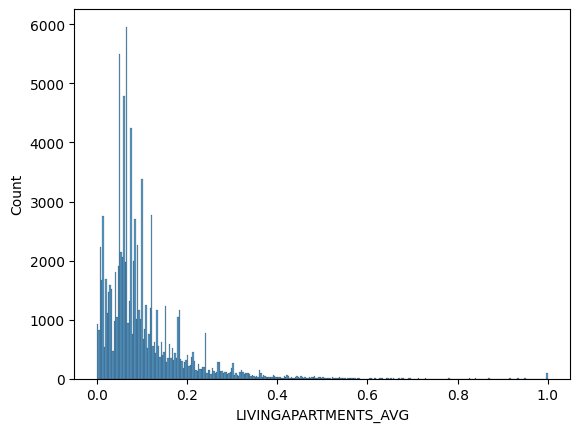

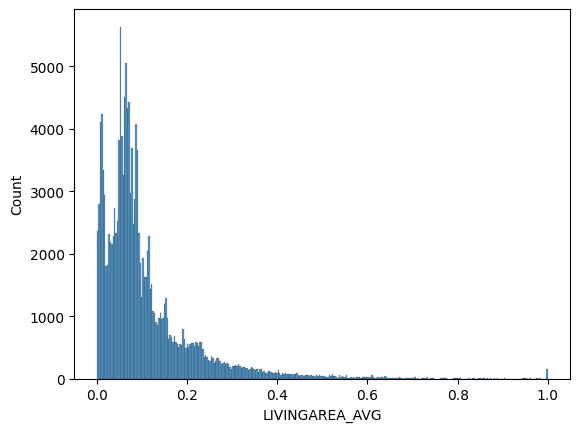

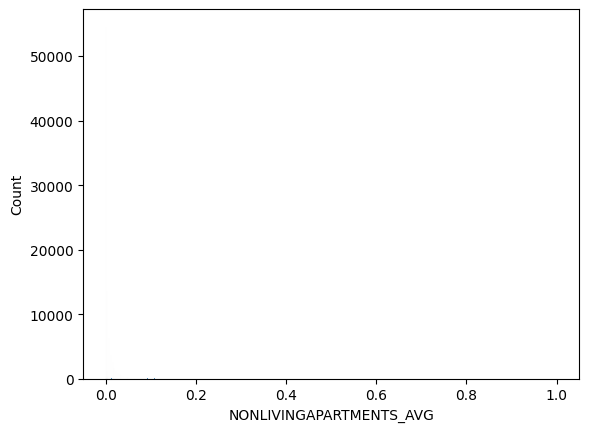

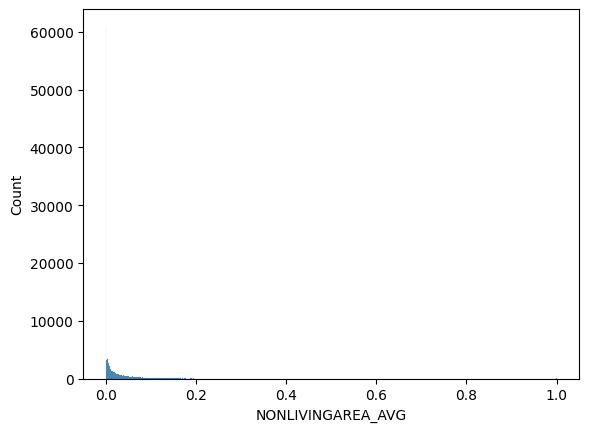

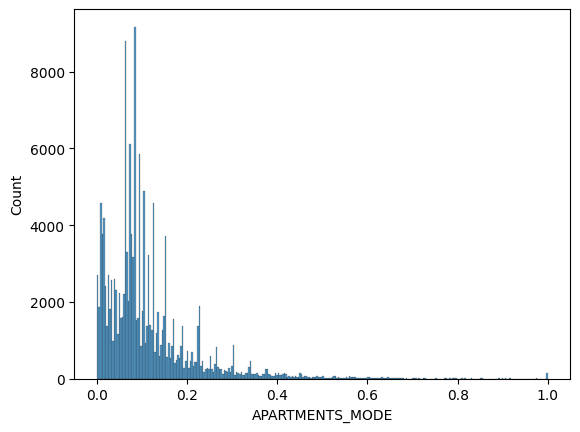

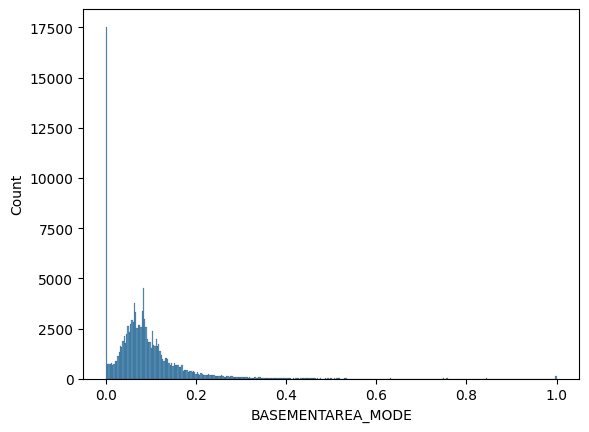

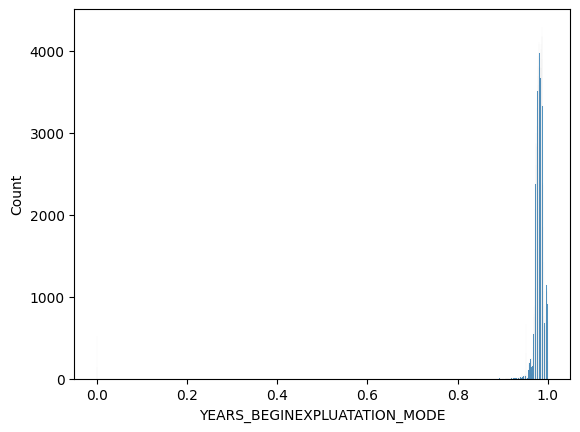

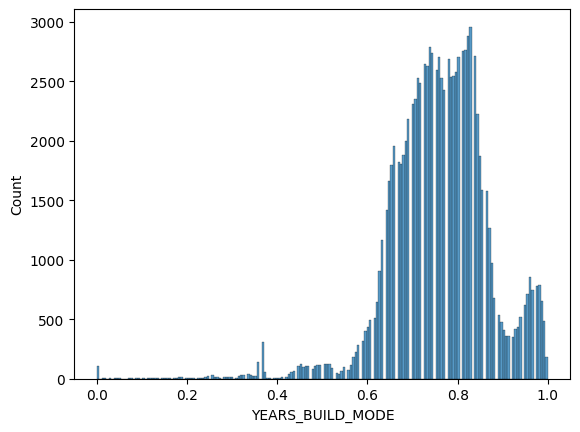

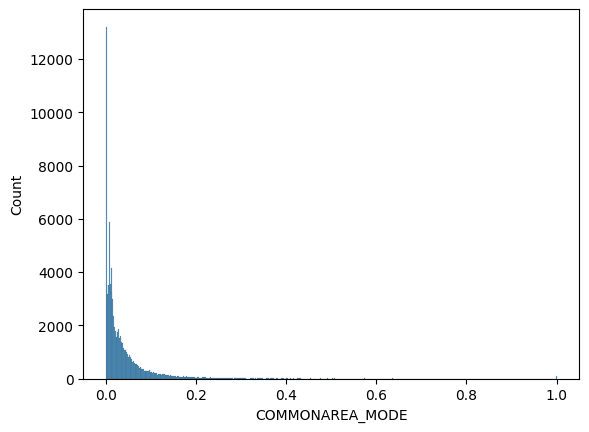

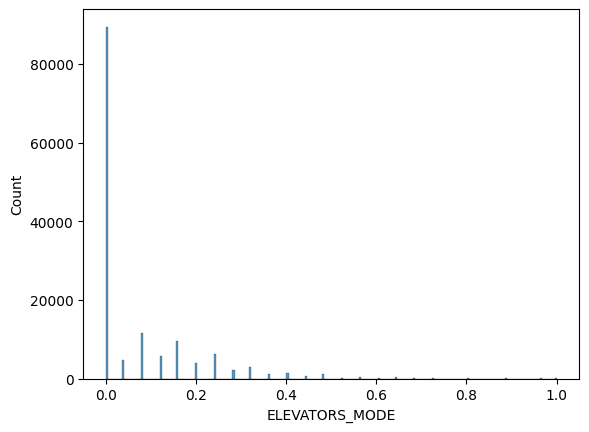

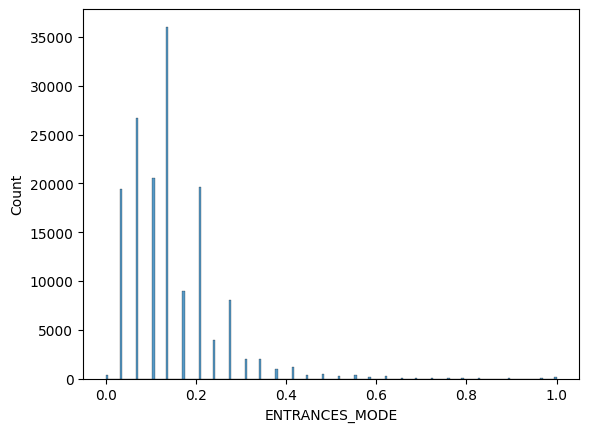

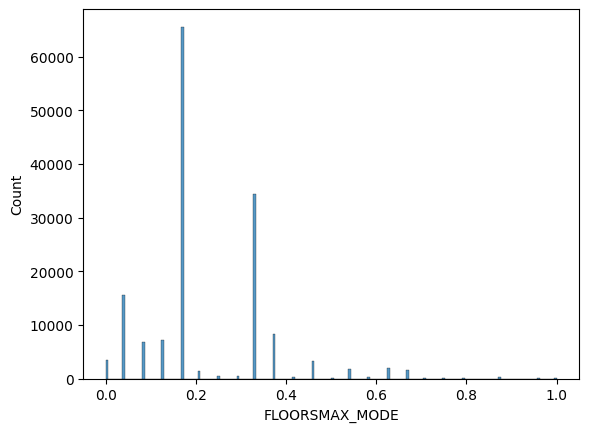

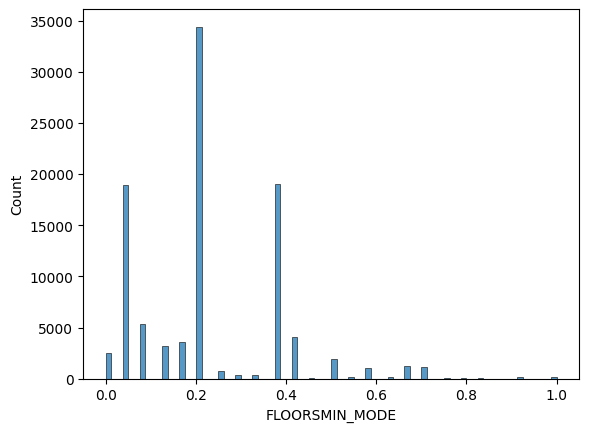

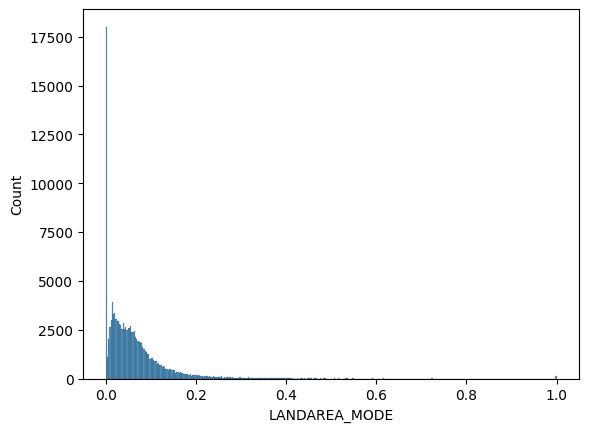

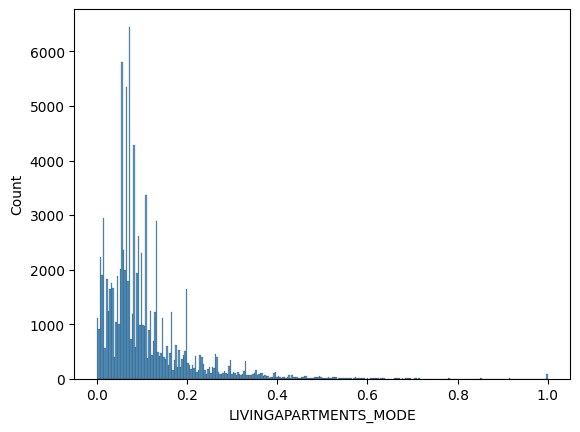

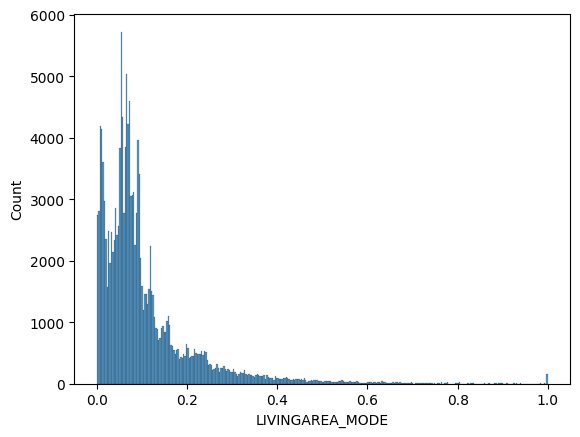

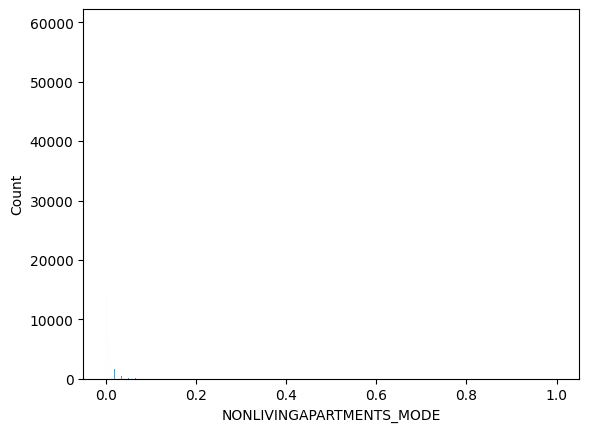

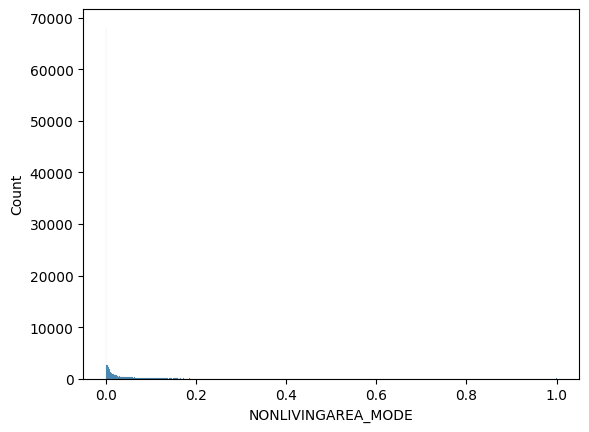

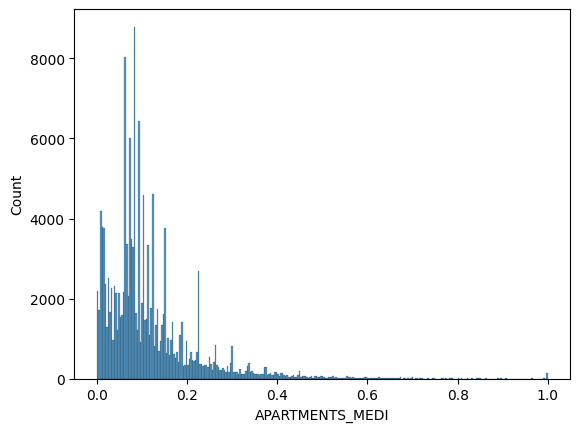

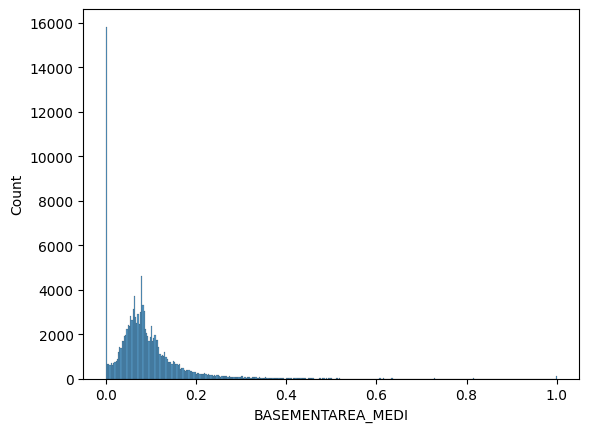

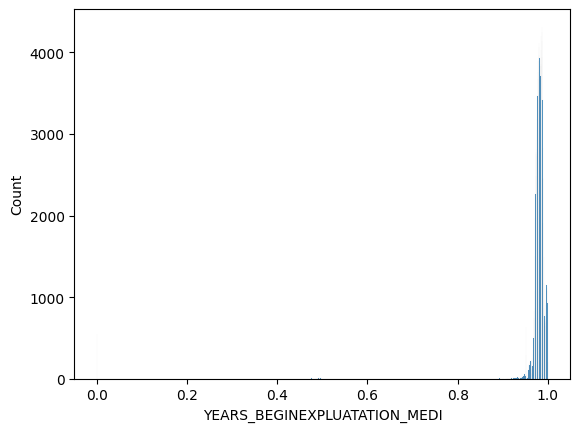

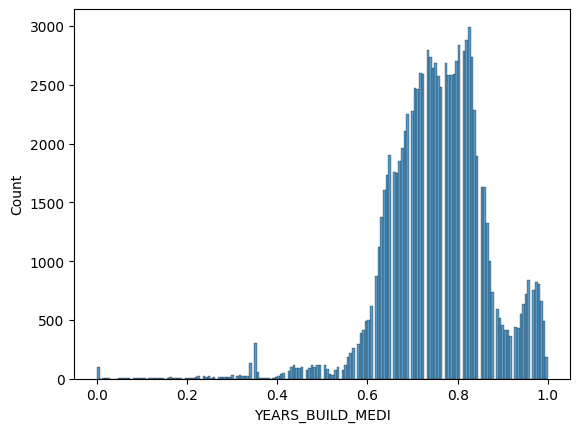

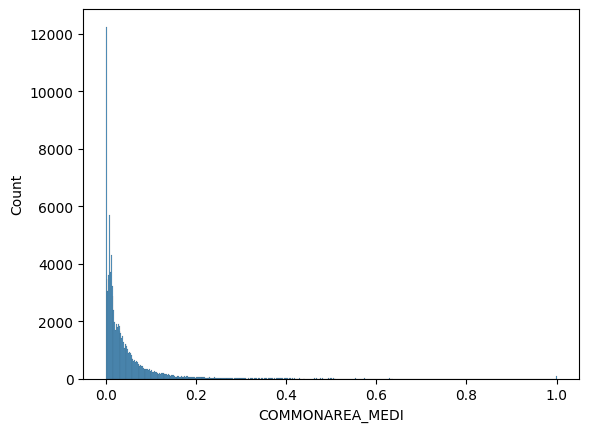

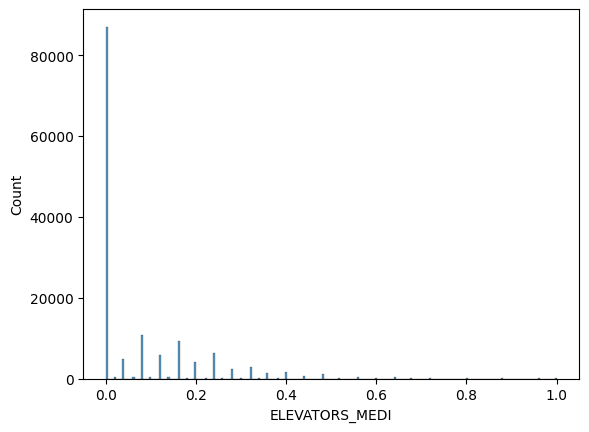

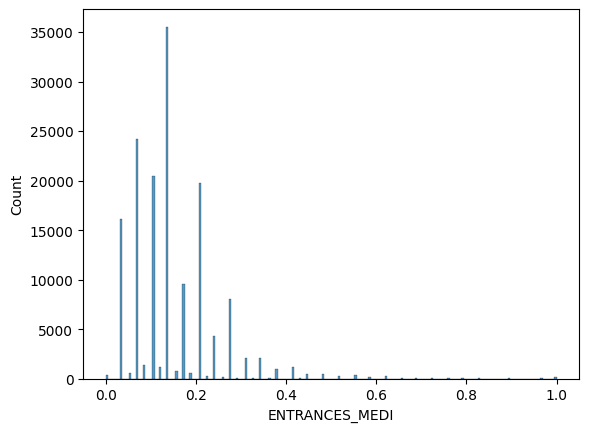

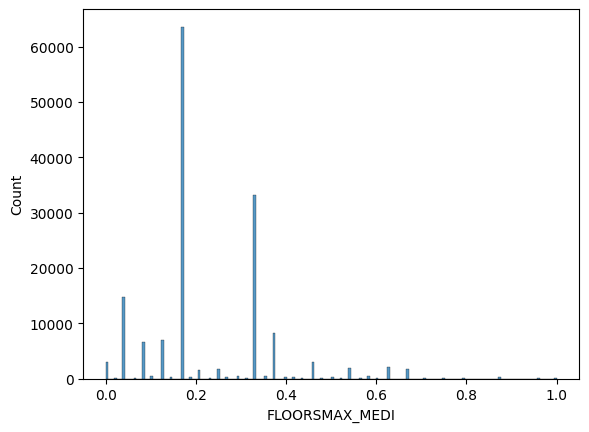

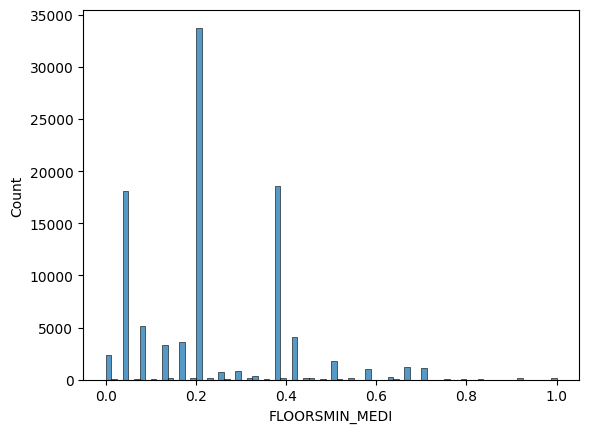

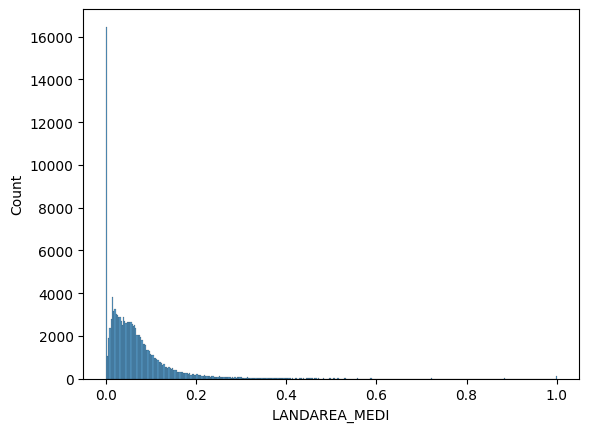

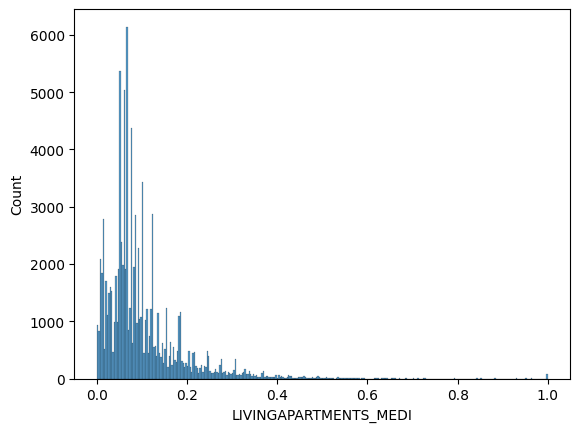

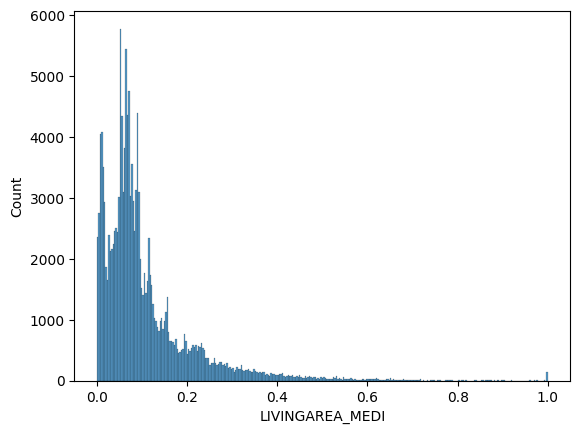

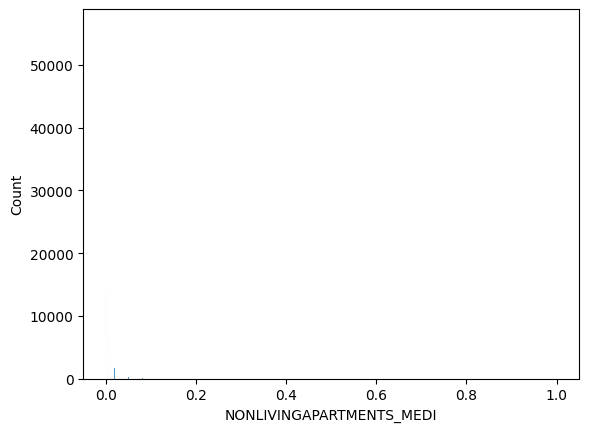

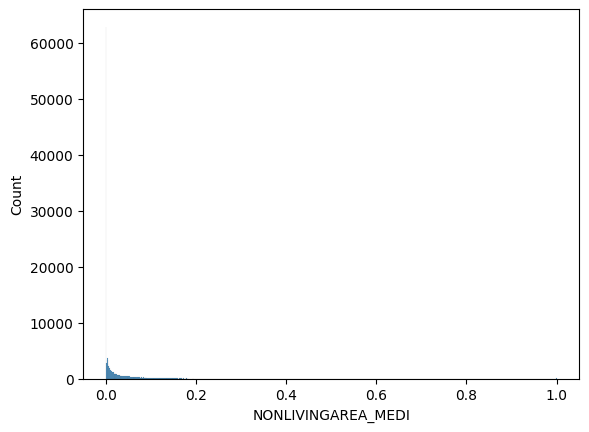

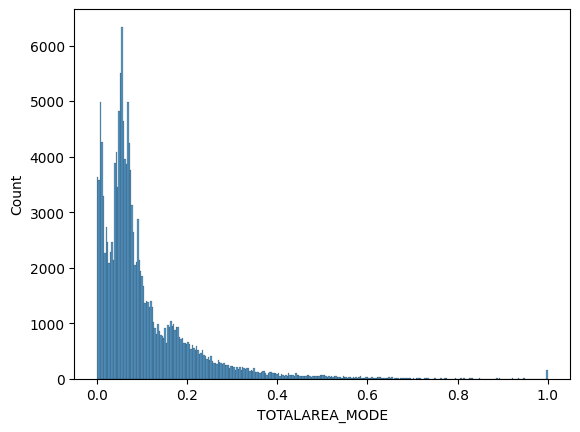

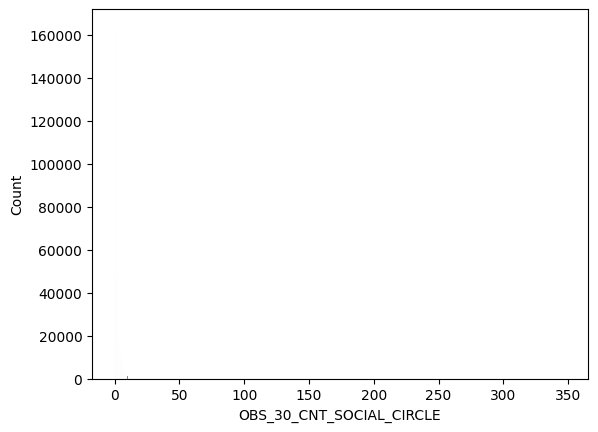

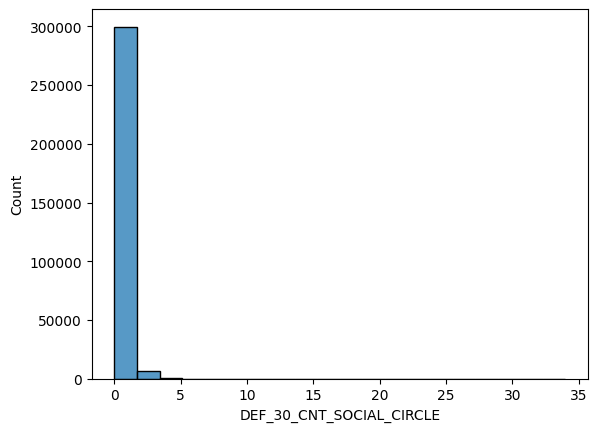

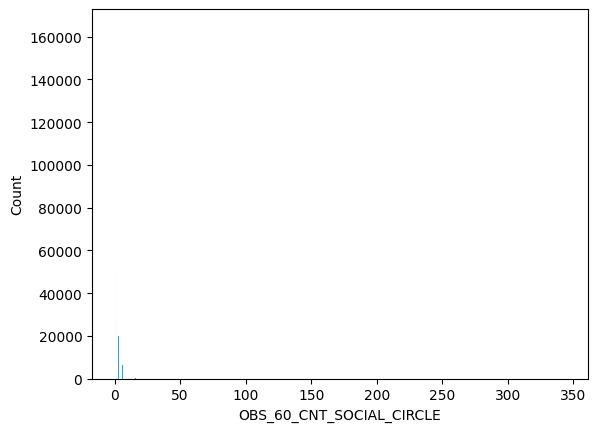

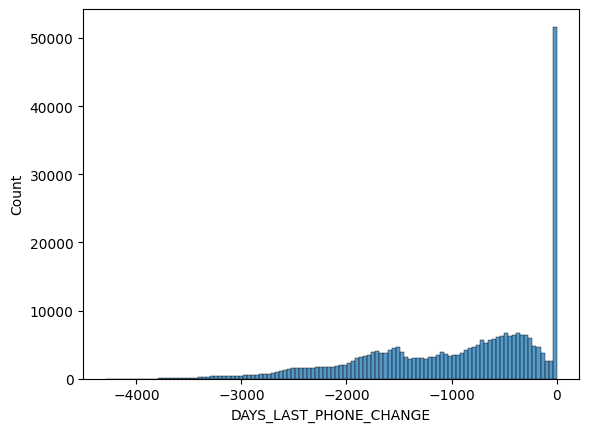

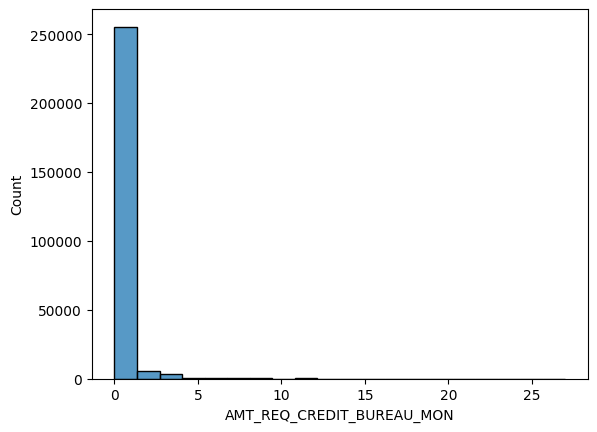

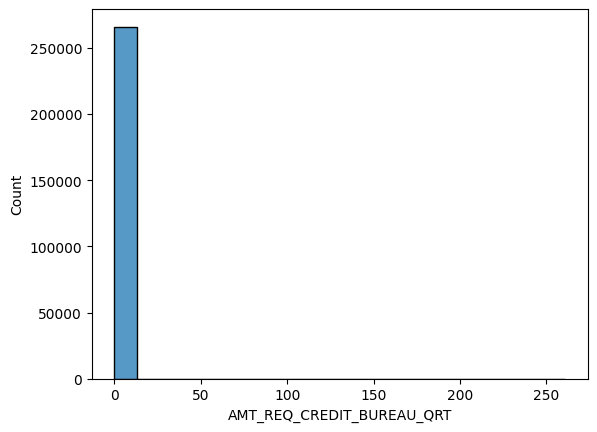

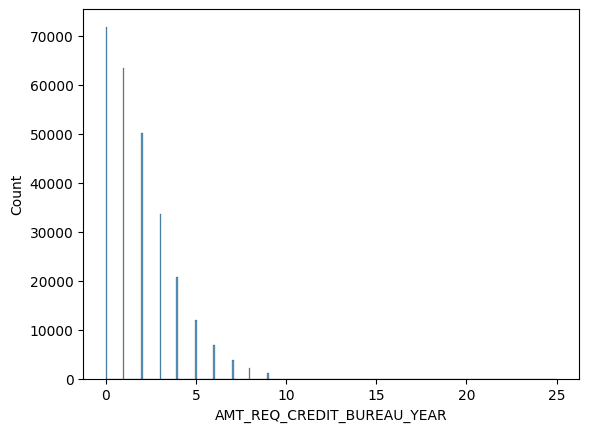

In [17]:
plt.figure(figsize=(8,7))
for col in continuous_data:
    sns.histplot(data=data_copy, x=col)
    plt.show()

#### Observation: some features are normally distributed after being logarithmically transformed, some are not due to outliers

In [18]:
numerical_df = data_copy[numerical_feats]
categorical_df = data_copy[categorical_feats]


print(f'The number of columns with numerical values is {numerical_df.shape[1]}')
print(f'The number of columns with numerical values is {categorical_df.shape[1]}')

The number of columns with numerical values is 106
The number of columns with numerical values is 16


* Columns with numerical values is 106 in total
* While columns with categorical values is 16 in total

In [19]:
continuous_data = [col for col in numerical_df.columns if numerical_df[col].nunique() >=20]
discrete_data = [col for col in numerical_df.columns if col not in continuous_data]

numerical_df[continuous_data].describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000
mean,278180.518577,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,12.063419,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,1.405292,-962.858788,0.267395,1.899974
std,102790.175348,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,3.265832,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,0.161380,0.081184,0.092576,0.110565,0.047732,0.069523,0.107936,0.084307,0.064575,0.110111,0.074445,0.132256,0.100977,0.143709,0.161160,0.081750,0.097880,0.111845,0.046276,0.070254,0.109076,0.082179,0.059897,0.112066,0.076144,0.134467,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,2.379803,826.808487,0.916002,1.869295
min,100002.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000
25%,189145.500000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,10.000000,0.334007,3.924574e-

### checking for outliers

(-0.05, 1.05, 0.5, -0.5)

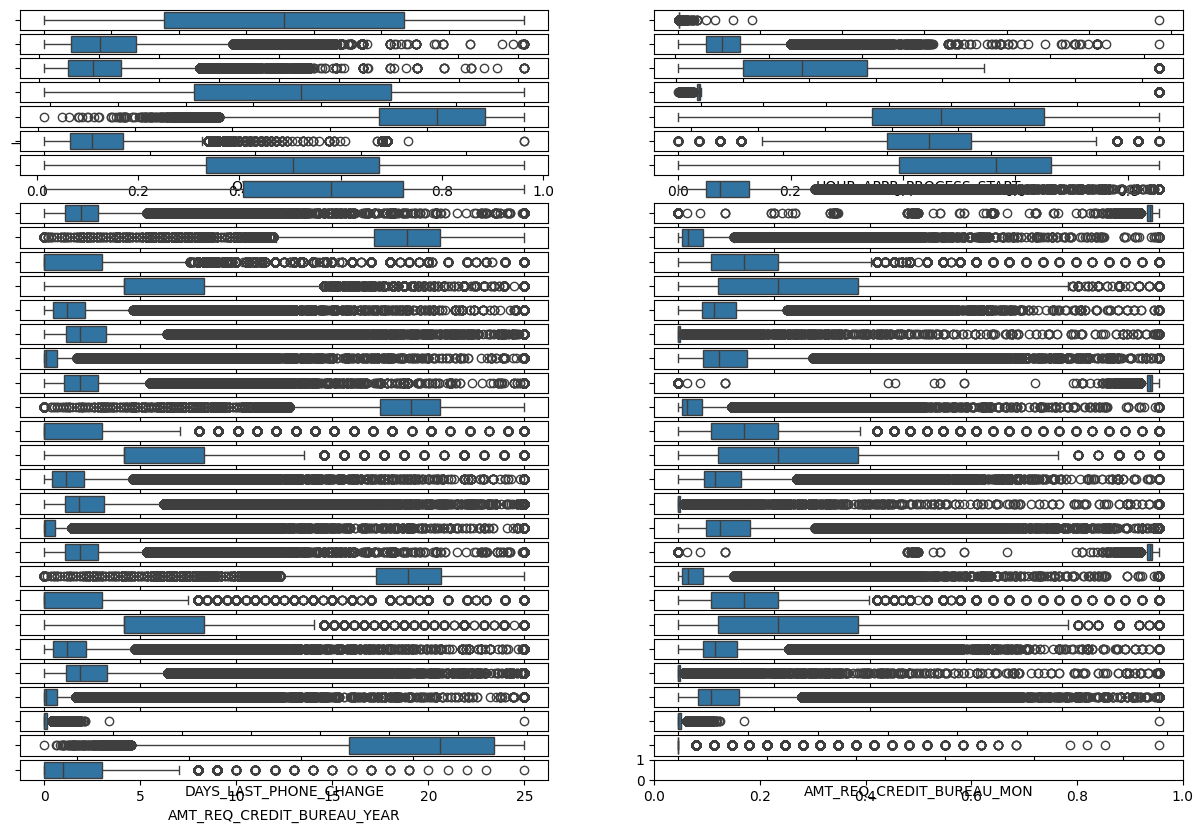

In [20]:
fig, ax = plt.subplots(nrows=((len(numerical_df[continuous_data].columns)+1)//2), ncols=2, figsize=(15,10))

for i, col in enumerate(numerical_df[continuous_data].columns):
    sns.boxplot(x=numerical_df[col], ax=ax[i//2, i%2])

ax[7,0].axis("off")
ax[7,1].axis("off")

#### Let's check correlation for the numerical values

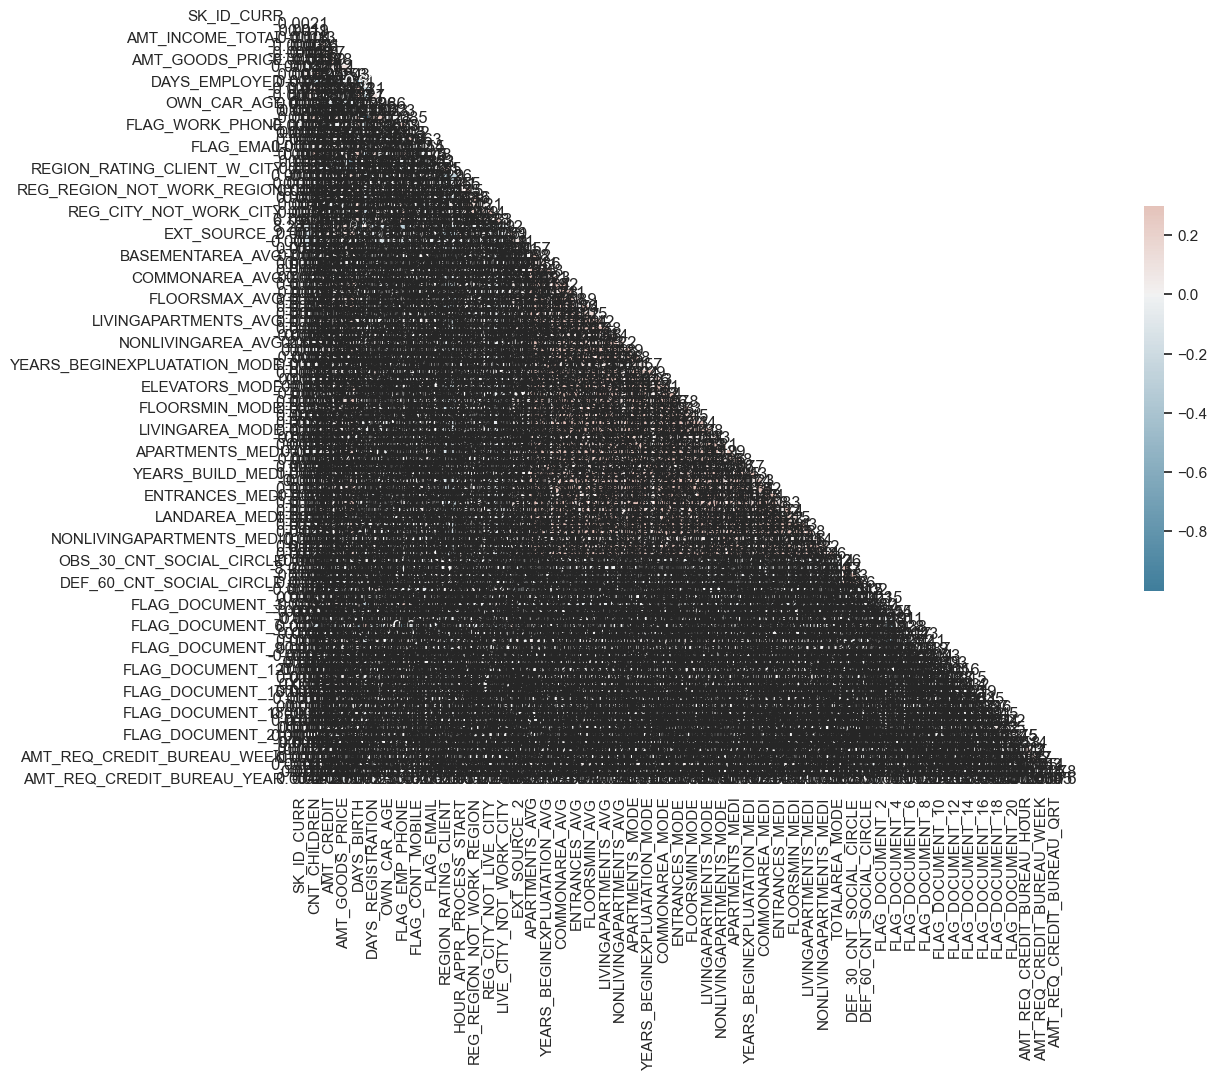

In [22]:
sns.set_theme(style="white")
corr = data_copy[numerical_feats].corr()
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))

#Creating cmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

### The correlation matrix image is unreadable, so what do we do???
>***we can view a dataframe of our correlation matrix, or use an interactive visualizing tool like plotly or bokeh.***

In [23]:
import plotly
import plotly.graph_objs as go
import plotly.offline as pyo


heatmap = go.Heatmap(
    z = corr,
    x = corr.columns,
    y = corr.columns,
    colorscale = 'Viridis'
)

#Create a layout
layout = go.Layout(title='Correlation Matrix', xaxis=dict(title='Features'), yaxis=dict(title='Features'))
#Create the figure
fig = go.Figure(data=[heatmap], layout=layout)

#Plot tje figure
pyo.plot(fig, filename='correlation.html')

'correlation.html'

### After running the above a code, an HTML file that shows our correlation plot is shown, and we see that we have multi-collinearity problem among out features, so what do we then???

> Best thing to do is to remove the one of the features highly correlated, at least the features that have about 80% and more, should be removed, since on of the features is telling the story already, but before then, to avoid overfitting, we will split our dataset into train and test dataset

In [24]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

X = data_copy.drop(["SK_ID_CURR", "TARGET"], axis=1)
y = data_copy.TARGET

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

#### Applying all feature engineering techniques is important before removing correlated features, so we shall engineer our data first

In [25]:
display(X_train.head(2))
display(X_test.head(2))
print(X_train.shape[1])

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
127044,Cash loans,F,N,N,0,157500.0,706410.0,67072.5,679500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-14653,-2062,-8599.0,-2087,NaN,1,1,0,1,1,0,Private service staff,2.0,1,1,WEDNESDAY,13,0,0,0,0,0,0,Services,NaN,0.632424,0.220095,NaN,0.105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0702,Panel,No,1.0,0.0,1.0,0.0,-1254.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
281143,Cash loans,F,Y,Y,1,121500.0,545040.0,25407.0,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007114,-13995,-2246,-348.0,-172,12.0,1,1,1,1,1,0,Secretaries,3.0,2,2,MONDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.593456,0.695997,0.633032,0.668,NaN,0.9856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6817,NaN,NaN,0.6807,NaN,0.9856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7102,NaN,NaN,0.6745,NaN,0.9856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6939,NaN,NaN,NaN,block of flats,0.5501,"Stone, brick",No,1.0,0.0,1.0,0.0,-907.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
245895,Cash loans,M,Y,N,2,207000.0,465457.5,52641.0,418500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009630,-13297,-762,-637.0,-4307,19.0,1,1,0,1,0,0,Sales staff,4.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.675878,0.604894,0.000527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
98194,Cash loans,F,Y,Y,0,247500.0,1281712.5,48946.5,1179000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.006852,-14778,-1141,-1610.0,-4546,11.0,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.430827,0.425351,0.712155,0.0753,0.0568,0.997,0.9592,0.1326,0.08,0.0517,0.4167,0.2917,0.0735,0.0601,0.0844,0.0058,0.1118,0.0756,0.0566,0.994,0.9216,0.0523,0.0806,0.0345,0.3333,0.0417,0.0445,0.0652,0.0857,0.0,0.0,0.076,0.0568,0.997,0.9597,0.1335,0.08,0.0517,0.4167,0.2917,0.0748,0.0611,0.0859,0.0058,0.1142,reg oper account,block of flats,0.0754,Monolithic,No,2.0,0.0,2.0,0.0,-1071.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0


120


<font color='green'> <center>Features to visit both in train and test dataset will be </center></font>
> * NAME_EDUCATION_TYPE, NAME_HOUSING_TYPE and every other categorical dataset


In [26]:
cat_feats = X_train.select_dtypes(exclude="number").columns
print(len(cat_feats))
for col in cat_feats:
    print(f"For column {col}, with {X_train[col].nunique()} values:")
    print(X_train[col].unique())
    print()

16
For column NAME_CONTRACT_TYPE, with 2 values:
['Cash loans' 'Revolving loans']

For column CODE_GENDER, with 3 values:
['F' 'M' 'XNA']

For column FLAG_OWN_CAR, with 2 values:
['N' 'Y']

For column FLAG_OWN_REALTY, with 2 values:
['N' 'Y']

For column NAME_TYPE_SUITE, with 7 values:
['Unaccompanied' 'Spouse, partner' 'Family' 'Other_A' 'Group of people'
 'Children' 'Other_B' nan]

For column NAME_INCOME_TYPE, with 8 values:
['Commercial associate' 'Working' 'Pensioner' 'State servant' 'Student'
 'Maternity leave' 'Unemployed' 'Businessman']

For column NAME_EDUCATION_TYPE, with 5 values:
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

For column NAME_FAMILY_STATUS, with 6 values:
['Married' 'Separated' 'Civil marriage' 'Single / not married' 'Widow'
 'Unknown']

For column NAME_HOUSING_TYPE, with 6 values:
['House / apartment' 'Municipal apartment' 'With parents'
 'Rented apartment' 'Office apartment' 'Co-op apartment']


#### Preprocessing Data

In [27]:
num_feats = X_train.select_dtypes(exclude="O").columns
print(len(num_feats))

104


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [29]:
X_test.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=120)

In [30]:
numerical_processor = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler(with_mean=False))
    ]
)

categorical_processor = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='constant')),
        ('cat_encoder', (OneHotEncoder(handle_unknown='ignore'))),
        ('scaler', StandardScaler(with_mean=False))
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pre', numerical_processor, num_feats),
        ('cat_pre', categorical_processor, cat_feats)
    ]
)

X_train = pd.DataFrame(preprocessor.fit_transform(X_train), columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(preprocessor.transform(X_test), columns=preprocessor.get_feature_names_out())



In [31]:
X_train.isna().sum()

num_pre__CNT_CHILDREN                         0
num_pre__AMT_INCOME_TOTAL                     0
num_pre__AMT_CREDIT                           0
num_pre__AMT_ANNUITY                          0
num_pre__AMT_GOODS_PRICE                      0
                                             ..
cat_pre__WALLSMATERIAL_MODE_Wooden            0
cat_pre__WALLSMATERIAL_MODE_missing_value     0
cat_pre__EMERGENCYSTATE_MODE_No               0
cat_pre__EMERGENCYSTATE_MODE_Yes              0
cat_pre__EMERGENCYSTATE_MODE_missing_value    0
Length: 250, dtype: int64

#### After preprocessing, the number of columns we have now is about 244, we can now check for outliers, multicollinearity
#### and perform feature selection

In [32]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

log_reg.score(X_train, y_train)

0.9191292269240954

In [33]:
log_reg.score(X_test, y_test)

0.9193639300192945

#### Now we have satisfied that our logistic regression performs well both on train and test datasets, but have we answered specific questions???

> No, so what are the questions that should be asked....
* Have we handled outliers???
* Have we handled multicollinearity case???
* Can our model be fed into a web app given the number of features we have???
* Do we know which feature has more weight, at least in feature selection

>> * The answer to all of these questions is <bold>NO</bold>

#### So let's answer these questions

In [34]:
for col in X_train.columns:
    
    #Calculate 25th and 75th percentile for each feature in the train dataset
    Q1 = np.percentile(X_train[col], 25)
    Q3 = np.percentile(X_train[col], 75)

    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    X_train[col] = X_train[col][(X_train[col]>=lower_bound) & (X_train[col] <= upper_bound)]
    X_train[col].fillna(X_train[col].mean(),inplace=True)
print('Outliers handled already')

Outliers handled already


In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### We will be using VIF 
> what is VIF???

>> Variance Inflation Factor (VIF)
The most straightforward way to detect multicollinearity in data is using a metric called Variance Inflation Factor (VIF). VIF identifies the correlation between independent variables and quantifies the strength of this correlation. It starts with a value of 1 that indicates no correlation between independent variables. Values between 1 and 5 indicate a moderate correlation that likely has little impact. A value greater than 5 represents a critical level of correlation in variables.

In [26]:
### Using VIF

x = X_train.shape[1]
vif = pd.DataFrame()
vif['VIF_FACTOR'] = [variance_inflation_factor(X_train.values, i) for i in range(x)]
vif

KeyboardInterrupt: 

#### VIF can take a considerable number of time for large dataset like ours, we shall use the Pearson's correlation method to save time

In [35]:
def collinearity():
    corr = X_train.corr()
    highly_correlated = set()
    highly_correlated_list = []
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) >= 0.85:
                colname = corr.columns[i]
                highly_correlated.add(colname)
                highly_correlated_list.append(colname)
    return highly_correlated, highly_correlated_list
highly_correlated_set, highly_correlated_list = collinearity()

In [36]:
for col_name in highly_correlated_set:
    if col_name not in highly_correlated_list:
        print(col_name)
    else:
        pass
print(len(highly_correlated_list), len(highly_correlated_set))

64 34


In [37]:
list_of_colnames = []
for colname in highly_correlated_set:
    list_of_colnames.append(colname)
list_of_colnames

['num_pre__LIVINGAREA_MODE',
 'num_pre__ELEVATORS_MEDI',
 'num_pre__FLOORSMAX_MODE',
 'num_pre__ENTRANCES_MEDI',
 'num_pre__ELEVATORS_MODE',
 'num_pre__COMMONAREA_MEDI',
 'num_pre__NONLIVINGAREA_MODE',
 'num_pre__NONLIVINGAREA_MEDI',
 'cat_pre__EMERGENCYSTATE_MODE_missing_value',
 'cat_pre__FONDKAPREMONT_MODE_missing_value',
 'num_pre__NONLIVINGAPARTMENTS_MODE',
 'cat_pre__FLAG_OWN_REALTY_Y',
 'cat_pre__WALLSMATERIAL_MODE_missing_value',
 'num_pre__FLOORSMIN_MODE',
 'num_pre__CNT_FAM_MEMBERS',
 'cat_pre__CODE_GENDER_M',
 'num_pre__YEARS_BEGINEXPLUATATION_MEDI',
 'num_pre__APARTMENTS_MEDI',
 'cat_pre__EMERGENCYSTATE_MODE_No',
 'num_pre__YEARS_BEGINEXPLUATATION_MODE',
 'cat_pre__HOUSETYPE_MODE_missing_value',
 'num_pre__NONLIVINGAPARTMENTS_MEDI',
 'num_pre__OBS_60_CNT_SOCIAL_CIRCLE',
 'num_pre__LIVINGAREA_MEDI',
 'num_pre__AMT_REQ_CREDIT_BUREAU_QRT',
 'num_pre__AMT_GOODS_PRICE',
 'num_pre__YEARS_BUILD_MODE',
 'cat_pre__FLAG_OWN_CAR_Y',
 'num_pre__YEARS_BUILD_MEDI',
 'num_pre__FLOORSMAX_M

In [38]:
X_train_select = X_train.drop(list_of_colnames, axis=1)
X_test_select = X_test.drop(list_of_colnames, axis=1)

print(X_test_select.shape[1], X_train_select.shape[1])

216 216


In [39]:
log_reg.fit(X_train_select, y_train)

log_reg.score(X_train_select, y_train)

0.91905489716943

In [40]:
log_reg.score(X_test_select, y_test)

0.9193205714657359

#### We shall perform <font color='red'>Feature Selection</font> using MUTUAL Information gain

I(X:Y) = H(X) - H(X|Y), mutual information gain for classification problem uses the concept of entropy, where H(X) is entorpy of the features and H(X|Y) is the entropy of X given that Y has occured

In [41]:
from sklearn.feature_selection import mutual_info_classif

MI = mutual_info_classif(X_train_select, y_train)
MI

array([3.32116515e-03, 3.11777986e-03, 6.34638483e-03, 1.17753165e-02,
       2.93806822e-03, 3.66117722e-03, 7.59474198e-03, 1.28990470e-03,
       1.76596525e-03, 3.39721486e-02, 3.31554214e-02, 4.68838311e-02,
       4.60389968e-04, 4.32694387e-02, 8.89713831e-03, 4.66905806e-04,
       3.12471551e-02, 3.02575936e-02, 3.74053561e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.04256719e-04, 0.00000000e+00,
       0.00000000e+00, 3.35369463e-02, 1.17074569e-02, 1.51669750e-02,
       1.27397795e-02, 2.03134735e-02, 1.40107215e-02, 3.19460174e-02,
       5.88377938e-02, 1.30986796e-02, 2.21888152e-02, 1.37691632e-02,
       4.64585097e-02, 2.37098566e-02, 3.02525343e-02, 1.53533531e-02,
       2.18338151e-02, 2.34906996e-02, 1.32176129e-02, 1.65668348e-02,
       5.88826839e-02, 1.26706439e-02, 2.82616069e-02, 3.02542721e-02,
       1.99535067e-02, 1.71485753e-02, 2.75482562e-03, 1.37993873e-04,
       4.90724826e-04, 1.97403500e-03, 1.48181080e-04, 3.86226724e-02,
      

In [42]:
MI = pd.Series(MI)
MI.index = X_train_select.columns
MI.sort_values(ascending=False)

num_pre__COMMONAREA_MODE                             0.058883
num_pre__COMMONAREA_AVG                              0.058838
num_pre__FLAG_EMP_PHONE                              0.046884
cat_pre__NAME_TYPE_SUITE_Unaccompanied               0.046732
num_pre__FLOORSMIN_AVG                               0.046459
                                                       ...   
cat_pre__ORGANIZATION_TYPE_Business Entity Type 3    0.000000
cat_pre__ORGANIZATION_TYPE_Business Entity Type 2    0.000000
num_pre__AMT_REQ_CREDIT_BUREAU_DAY                   0.000000
cat_pre__ORGANIZATION_TYPE_Bank                      0.000000
cat_pre__EMERGENCYSTATE_MODE_Yes                     0.000000
Length: 216, dtype: float64

<Axes: >

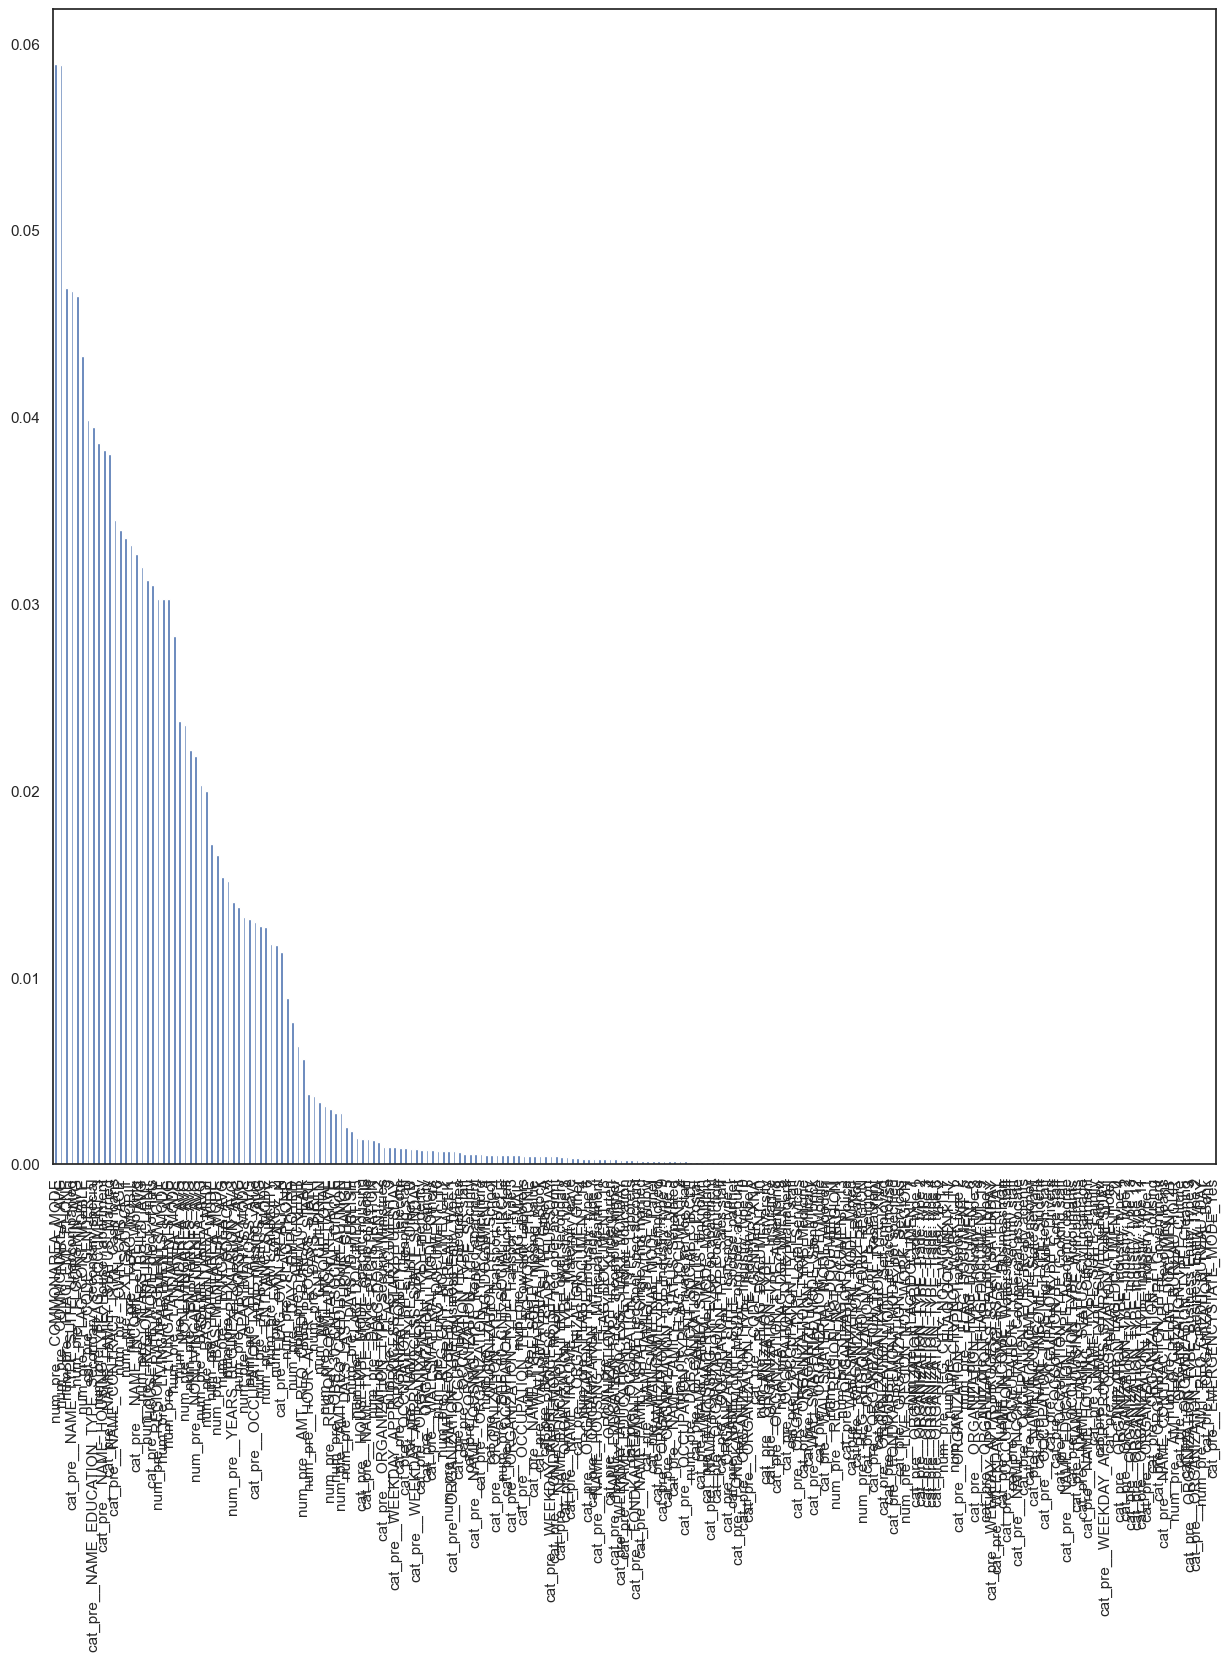

In [43]:
MI.sort_values(ascending=False).plot.bar(figsize=(15,15))

### From Feature Selection using Mutual Info Gain, we shall Use SelectKBest to select the best 30 features

In [44]:
from sklearn.feature_selection import SelectKBest
sele_30_cols = SelectKBest(mutual_info_classif, k=30)
sele_30_cols.fit(X_train_select.fillna(0), y_train)
selection = X_train_select.columns[sele_30_cols.get_support()]
print(selection)

Index(['num_pre__OWN_CAR_AGE', 'num_pre__FLAG_MOBIL',
       'num_pre__FLAG_EMP_PHONE', 'num_pre__FLAG_CONT_MOBILE',
       'num_pre__REGION_RATING_CLIENT', 'num_pre__REGION_RATING_CLIENT_W_CITY',
       'num_pre__EXT_SOURCE_1', 'num_pre__BASEMENTAREA_AVG',
       'num_pre__YEARS_BUILD_AVG', 'num_pre__COMMONAREA_AVG',
       'num_pre__ENTRANCES_AVG', 'num_pre__FLOORSMIN_AVG',
       'num_pre__LANDAREA_AVG', 'num_pre__LIVINGAPARTMENTS_AVG',
       'num_pre__NONLIVINGAPARTMENTS_AVG', 'num_pre__NONLIVINGAREA_AVG',
       'num_pre__COMMONAREA_MODE', 'num_pre__LANDAREA_MODE',
       'num_pre__LIVINGAPARTMENTS_MODE', 'num_pre__BASEMENTAREA_MEDI',
       'num_pre__TOTALAREA_MODE', 'num_pre__FLAG_DOCUMENT_3',
       'cat_pre__NAME_CONTRACT_TYPE_Cash loans', 'cat_pre__CODE_GENDER_F',
       'cat_pre__NAME_TYPE_SUITE_Unaccompanied',
       'cat_pre__NAME_INCOME_TYPE_Working',
       'cat_pre__NAME_EDUCATION_TYPE_Secondary / secondary special',
       'cat_pre__NAME_FAMILY_STATUS_Married',
      

### Let's test this selection again on a model

In [36]:
X_train_select_2 = X_train[selection]
X_test_select_2 = X_test[selection]

log_reg_2 = LogisticRegression()
log_reg_2.fit(X_train_select_2, y_train)

LogisticRegression()

In [37]:
log_reg_2.score(X_train_select_2, y_train)

0.919110644485429

In [38]:
log_reg_2.score(X_test_select_2, y_test)

0.9196457606174258

#### Predictive Models

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

### Random Forest with Hyperparameter Tuning

In [54]:
random_forest = RandomForestClassifier()
param_grid = {
    "n_estimators" : [100, 200],
    "criterion" : ["gini", "entropy"],
    "max_depth" :[2,3],
    "min_samples_split" : [3,4],
    "min_samples_leaf" : [3,4],
    "max_features" : [10, 15]
}
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train_select_2, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2, 3],
                         'max_features': [10, 15], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [3, 4],
                         'n_estimators': [100, 200]})

### Retraining Our model with the best parameters found

In [57]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 100}

In [40]:
random_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=2, max_features=10, min_samples_leaf=3, min_samples_split=3)

#### Metrics to compute accuracy and performance of model

In [41]:
from sklearn.metrics import (accuracy_score, precision_recall_curve, precision_score, f1_score, confusion_matrix,
                            roc_auc_score, auc, log_loss, classification_report, recall_score, roc_curve)

Plotting confusion matrix


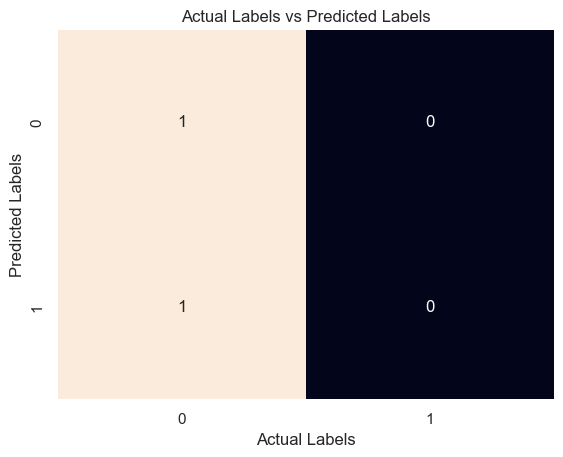

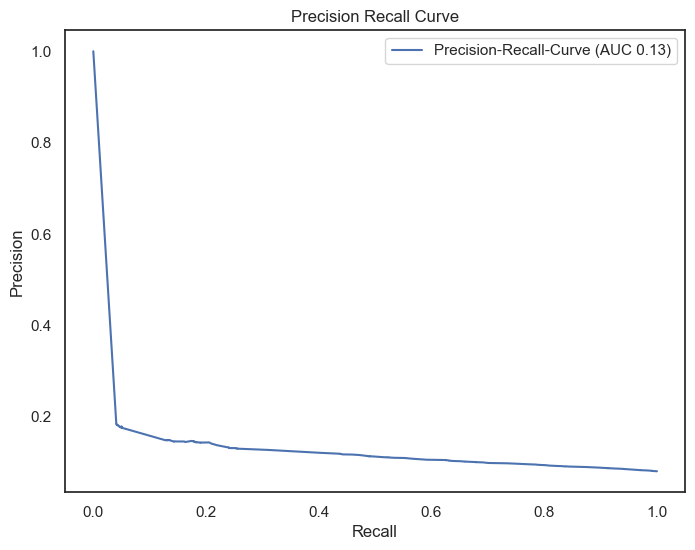

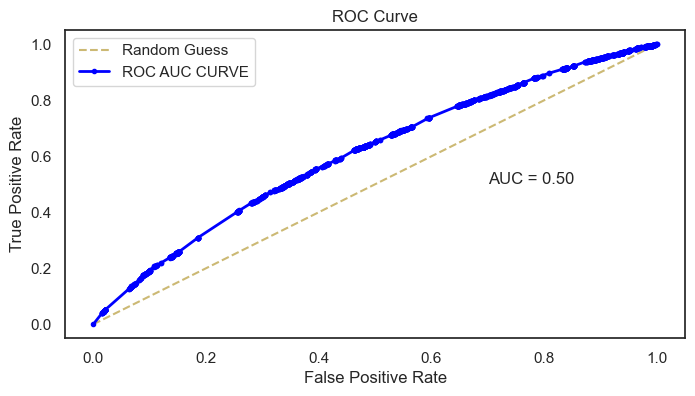

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84841
           1       0.00      0.00      0.00      7413

    accuracy                           0.92     92254
   macro avg       0.46      0.50      0.48     92254
weighted avg       0.85      0.92      0.88     92254

<function precision_score at 0x000001E927762E80> 0.27593503438312705 0.0 0.919110644485429 0.9196457606174258 0.5


In [45]:
import os
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    y_proba    = model.predict_proba(X_test)[:, 1]
    # Evaluating model performance
    # Accuracy on both train and test dqta
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    #Precision, Recall, f1-score, roc_auc score, AUC score,log loss
    
    Precision_Score = precision_score(y_test, y_test_pred)
    Recall_Score = recall_score(y_test, y_test_pred)
    F1_Score = f1_score(y_test, y_test_pred)
    ROC_AUC = roc_auc_score(y_test, y_test_pred)
    Log_Loss = log_loss(y_test, y_proba)


    #Plot Confusion Matrix
    print("Plotting confusion matrix")
    cf = confusion_matrix(y_test, y_test_pred, normalize="true")
    sns.heatmap(cf, annot=True, cbar=False)
    plt.title("Actual Labels vs Predicted Labels")
    plt.xlabel("Actual Labels")
    plt.ylabel("Predicted Labels")
    plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
    plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'])
    plt.show()
    
    #Precision-Recall-Curve
    Precision, Recall, _ = precision_recall_curve(y_test, y_proba)
    area_under_curve = auc(Recall, Precision)
    plt.figure(figsize=(8,6))
    plt.plot(Recall, Precision, label=f"Precision-Recall-Curve (AUC {area_under_curve:.2f})", color="b")
    plt.xlabel('Recall')
    plt.ylabel("Precision")
    plt.title("Precision Recall Curve")
    plt.legend(loc='best')
    plt.show();
    
    #ROC-AUC Curve
    
    fpr,tpr, threshold = roc_curve(y_test, y_proba)
    plt.figure(figsize=(8,4))
    plt.plot([0, 1], [0, 1], 'y--', label = 'Random Guess')
    plt.plot(fpr, tpr, lw=2, marker=".", color='blue', label="ROC AUC CURVE")
    plt.annotate(f"AUC = {ROC_AUC:.2f}", xy=(0.7, 0.5), fontsize=12)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

    print(classification_report(y_test, y_test_pred))

    print(precision_score, Log_Loss, Recall_Score, train_acc, test_acc, ROC_AUC)
train_model(model=random_model, X_train=X_train_select_2, y_train=y_train, X_test=X_test_select_2, y_test=y_test)
